STEP 1: IMPORTING REQUIRED LIBRARIES

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


STEP 2:  DESCRIBING DATASET PATH

In [2]:
import os
print(os.getcwd())


c:\Users\jabba\OneDrive\Desktop\fruits-360_100x100\fruits-360


In [3]:
BASE_DIR = r"c:\Users\jabba\OneDrive\Desktop\fruits-360_100x100\fruits-360"

TRAIN_DIR = os.path.join(BASE_DIR, "Training")
TEST_DIR  = os.path.join(BASE_DIR, "Test")

print("Training exists:", os.path.exists(TRAIN_DIR))
print("Test exists:", os.path.exists(TEST_DIR))


Training exists: True
Test exists: True


In [4]:
IMG_SIZE = 100
BATCH_SIZE = 32
train_classes = sorted(os.listdir(TRAIN_DIR))
print("Number of classes:", len(train_classes))

Number of classes: 232


STEP 3: LOAD DATA USING IMAGE GENERATOR

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)


train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=train_classes  
)

test_data = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=train_classes   
)


Found 122825 images belonging to 232 classes.
Found 40784 images belonging to 232 classes.


In [6]:
print("Number of classes in training data:", len(train_data.class_indices))
print(train_data.class_indices)


Number of classes in training data: 232
{'Apple 10': 0, 'Apple 11': 1, 'Apple 12': 2, 'Apple 13': 3, 'Apple 14': 4, 'Apple 17': 5, 'Apple 18': 6, 'Apple 19': 7, 'Apple 5': 8, 'Apple 6': 9, 'Apple 7': 10, 'Apple 8': 11, 'Apple 9': 12, 'Apple Braeburn 1': 13, 'Apple Core 1': 14, 'Apple Crimson Snow 1': 15, 'Apple Golden 1': 16, 'Apple Golden 2': 17, 'Apple Golden 3': 18, 'Apple Granny Smith 1': 19, 'Apple Pink Lady 1': 20, 'Apple Red 1': 21, 'Apple Red 2': 22, 'Apple Red 3': 23, 'Apple Red Yellow 1': 24, 'Apple Red Yellow 2': 25, 'Apple Rotten 1': 26, 'Apple hit 1': 27, 'Apple worm 1': 28, 'Apricot 1': 29, 'Avocado 1': 30, 'Avocado Black 1': 31, 'Avocado Black 2': 32, 'Avocado Green 1': 33, 'Avocado ripe 1': 34, 'Banana 1': 35, 'Banana 3': 36, 'Banana 4': 37, 'Banana Lady Finger 1': 38, 'Banana Red 1': 39, 'Beans 1': 40, 'Beetroot 1': 41, 'Blackberrie 1': 42, 'Blackberrie 2': 43, 'Blackberrie half rippen 1': 44, 'Blackberrie not rippen 1': 45, 'Blueberry 1': 46, 'Cabbage red 1': 47, 'Cab

STEP 4: BUILD CNN MODEL

In [7]:
NUM_CLASSES = len(train_classes)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\jabba\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 232)            │        59,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,429,928 (13.08 MB)

 Trainable params: 3,429,928 (13.08 MB)

 Non-trainable params: 0 (0.00 B)

STEP 5: TRAIN THE MODEL

In [ ]:
history = model.fit(
    train_data,
    steps_per_epoch=200,
    epochs=15,
    validation_data=test_data,
    validation_steps=50
)


Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 55s 257ms/step - accuracy: 0.2605 - loss: 3.5818 - val_accuracy: 0.6012 - val_loss: 1.6000
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 45s 224ms/step - accuracy: 0.7553 - loss: 0.8653 - val_accuracy: 0.7731 - val_loss: 0.7369
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 68s 338ms/step - accuracy: 0.8559 - loss: 0.4778 - val_accuracy: 0.8519 - val_loss: 0.5647
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 82s 408ms/step - accuracy: 0.9111 - loss: 0.2965 - val_accuracy: 0.8687 - val_loss: 0.4077
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 80s 400ms/step - accuracy: 0.9322 - loss: 0.2150 - val_accuracy: 0.9106 - val_loss: 0.3323
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 78s 389ms/step - accuracy: 0.9444 - loss: 0.1857 - val_accuracy: 0.9056 - val_loss: 0.3541
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 74s 373ms/step - accuracy: 0.9498 - loss: 0.1635 - val_accuracy: 0.9231 - val_loss: 0.2879
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 74s 372ms/step - accuracy: 0.9663 - loss: 0

STEP 6: RANDOM IMAGE PICK + CLASSIFICATION ⭐⭐

In [ ]:
def predict_random_fruit_with_confidence():
    import random
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt

    fruit_class = random.choice(os.listdir(TEST_DIR))
    fruit_folder = os.path.join(TEST_DIR, fruit_class)

    img_name = random.choice(os.listdir(fruit_folder))
    img_path = os.path.join(fruit_folder, img_name)

    img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    confidence = np.max(prediction) * 100
    predicted_class = list(train_data.class_indices.keys())[np.argmax(prediction)]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.show()




STEP 7  : RUN THIS CELL AGAIN & AGAIN 🎯

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


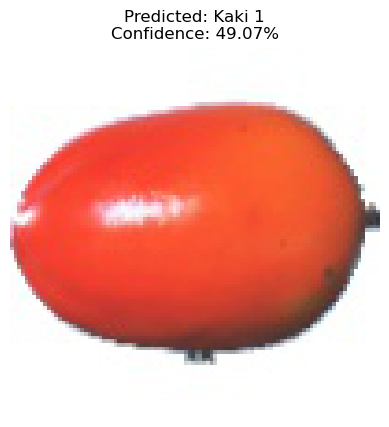

In [ ]:
predict_random_fruit_with_confidence()

STEP 8: Accuracy & loss graphs

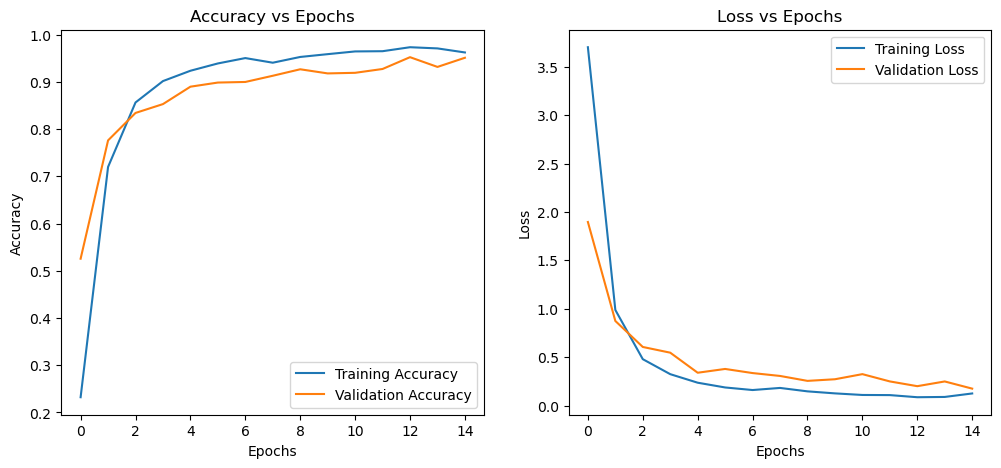

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

plt.show()


Found 1901 images belonging to 10 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step


<Figure size 800x800 with 0 Axes>

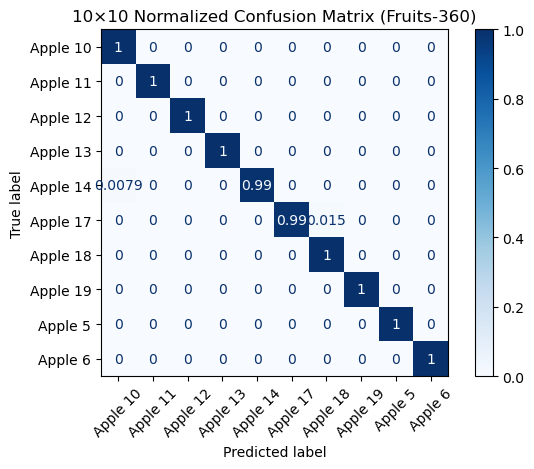

In [ ]:
IMG_SIZE = 100
BATCH_SIZE = 32
NUM_CLASSES_TO_SHOW = 10

all_classes = sorted([
    d for d in os.listdir(TRAIN_DIR)
    if os.path.isdir(os.path.join(TRAIN_DIR, d))
])
class_names = all_classes[:NUM_CLASSES_TO_SHOW]

test_datagen = ImageDataGenerator(rescale=1./255)

test_data_cm = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=class_names,
    shuffle=False
)
y_true = test_data_cm.classes
y_pred = np.argmax(model.predict(test_data_cm, verbose=1), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

cm = cm[:NUM_CLASSES_TO_SHOW, :NUM_CLASSES_TO_SHOW]

cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_norm,
    display_labels=class_names
)

disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("10×10 Normalized Confusion Matrix (Fruits-360)")
plt.tight_layout()
plt.show()


In [ ]:
model.save("fruit_classifier_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
import json

class_indices = train_data.class_indices

with open("class_labels.json", "w") as f:
    json.dump(class_indices, f)

print("Class labels saved!")


Class labels saved!
